In [1]:
import glove
import music21

In [2]:
def transpose_to_all(c):
    out = []
    old = c
    for i in range(12):
        new = old.transpose(7)
        out.append(new)
        old = new
    return out

def transpose_to_some(c, degree):
    out = []
    out.append(c)
    old = c
    for i in range(degree):
        new = old.transpose(7)
        out.append(new)
        old = new
    return out
        
def c_to_strep(c):
    rep = ""
    for i in range(12):
        if i in c.pitchClasses:
            rep += "1"
        else:
            rep += "0"
    return rep

def strep_to_c(strep):
    pcs = []
    for i, v in enumerate(strep):
        if v == '1':
            pcs.append(i)
    return music21.chord.Chord(pcs)

def strep_to_symbol(strep):
    c = strep_to_c(strep)
    return music21.harmony.chordSymbolFigureFromChord(c)

def list_to_strep(s):
    l = eval(s)
    rep = ""
    for i in range(12):
        if i in l:
            rep += "1"
        else:
            rep += "0"
    return rep

In [6]:
from __future__ import print_function
import argparse
import pprint

from glove import Glove
from glove import Corpus


def read_data(filename):
    with open(filename, 'r') as f:
        data = [l for l in f.read().split(' ') if l != '']
    return data

In [17]:
bach = read_data('/home/eamonn/Projects/corpuscule/ycac/reasonable/1780.corpus')

In [18]:
corpus_model = Corpus()
corpus_model.fit([bach], window=5)
corpus_model.save('corpus.model')

print('Dict size: %s' % len(corpus_model.dictionary))
print('Collocations: %s' % corpus_model.matrix.nnz)

Dict size: 1569
Collocations: 125531


In [19]:
print('Training the GloVe model')

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus_model.matrix, epochs=150,
          no_threads=4, verbose=False)
glove.add_dictionary(corpus_model.dictionary)

glove.save('glove.model')

Training the GloVe model


In [25]:
glove.dictionary.keys()

dict_keys(['110100001000', '001100100011', '000100001000', '001011000101', '010100000110', '110100000000', '000101100001', '000101001000', '110001100010', '101010000000', '001100100110', '011100100000', '100110110000', '101010001001', '010000100011', '101100100000', '010010010001', '100010000000', '101101100110', '000011100100', '001110000001', '000000110110', '000000100110', '011001101000', '101000010101', '000100100000', '001001001001', '010010010111', '100000010100', '000011100010', '011111100010', '001001100001', '001010010010', '000101001101', '101111000100', '001111011000', '000000010101', '011110000001', '000110110100', '000100110100', '000000010001', '001100100101', '011011010110', '010010101001', '001011010000', '001001000110', '001100101000', '001000011011', '011010110100', '010110010000', '101100000001', '000100110001', '000010110010', '000010010101', '000001100000', '011010000110', '000101000110', '011010010100', '100100100010', '100100011011', '100000100101', '101010101101

In [20]:
majors = [c_to_strep(c) for c in transpose_to_all(music21.chord.Chord('C E G'))]

In [21]:
majors_vectors = [glove.word_vectors[glove.dictionary[strep]] for strep in majors]

In [22]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

In [23]:
p = PCA(n_components=2)
red = p.fit_transform(np.array(majors_vectors))

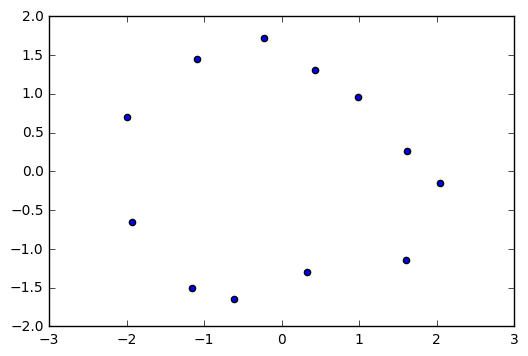

In [24]:
plt.scatter(red[:,0], red[:,1])